In [34]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Planet : Amazon space -- Post-Processing

## Helper functions
The following functions plot different evaluation metrics

In [ ]:
def plot_micro_macro(res, param='F1-score', hyper_param='Learning Rate'):
    """
    Plots the evolution of a given evaluation metric per Epoch of training and validation.
    This for a certain hyper-parameter
    :param res: training and validation results, in dataframe form
    :param param: choice of evaluation metric in ['Precision','Recall','F1-score']
    :param hyper_param: Hyper-parameter chosen to appear on the plot title
    :return: plot of the evolution of the selected metric
    """

    if param == 'Precision':
        x = 0
    elif param == 'Recall':
        x = 1
    elif param == 'F1-score':
        x = 2
    fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey='row')
    ax1 = axes[0, 0]
    ax2 = axes[0, 1]
    ax3 = axes[1, 0]
    ax4 = axes[1, 1]
    ax5 = axes[2, 0]
    ax6 = axes[2, 1]

    for j in range(len(res)):
        ax1.plot(np.arange(1, 6), res[j]['training'].values[x], label=str(batch[j]))
        ax2.plot(np.arange(1, 6), res[j]['validating'].values[x], label=str(batch[j]))
        ax3.plot(np.arange(1, 6), res[j]['training'].values[x + 3], label=str(batch[j]))
        ax4.plot(np.arange(1, 6), res[j]['validating'].values[x + 3], label=str(batch[j]))
        ax5.plot(np.arange(1, 6), res[j]['training'].values[x + 6], label=str(batch[j]))
        ax6.plot(np.arange(1, 6), res[j]['validating'].values[x + 6], label=str(batch[j]))

    ax1.set_title('Training')
    ax1.set_ylabel('Micro')
    ax2.set_title('Validation')
    ax3.set_ylabel('Macro')
    ax5.set_ylabel('Sample')
    ax5.set_xlabel('Epoch')
    ax6.set_xlabel('Epoch')

    #display plot
    handles, labels = ax2.get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=(1.2, 0.9))
    plt.style.use('ggplot')
    plt.suptitle(f'{param} Evolution per {hyper_param}')
    fig.tight_layout()
    plt.show()

def plot_loss(res ,param='Total loss',hyper_param='Learning Rate', title = True, legends = None):
    """
    Plots the evolution of the loss per Epoch of training and validation.
    This for a certain hyper-parameter
    :param res: training and validation results, in dataframe form
    :param param: choice of loss in ['Total loss','Hamming loss']
    :param hyper_param: Hyper-parameter chosen to appear on the plot title
    :param title: True or False
    :param legends: choice of legends
    :return: plot of the evolution of the selected metric
    """
    if param == 'Total loss':
        x = 10
        param = 'Binary cross entropy loss'
    elif param == 'Hamming loss':
        x = 9

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3.5), sharey=True)
    ax1 = axes[0]
    ax2 = axes[1]
    for j in range(len(res)):
        l = len(res[j]['training'].values[x])+1
        if legends:
            ax1.plot(np.arange(1,l),res[j]['training'].values[x], label=legends[j])
            ax2.plot(np.arange(1,l),res[j]['validating'].values[x], label=legends[j])
        else:
            ax1.plot(np.arange(1,l),res[j]['training'].values[x], label=str(batch[j]))
            ax2.plot(np.arange(1,l),res[j]['validating'].values[x], label=str(batch[j]))

    ax1.set_title('Training')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel(param)
    ax2.legend()
    ax2.set_title('Validation')
    ax2.set_xlabel('Epoch')
    #display plot
    plt.style.use('ggplot')
    if title:
        plt.suptitle(f'{param} Evolution per {hyper_param}')
    fig.tight_layout()
    plt.show()

def getColor(c, n, idx):
    import matplotlib as mpl
    cmap = mpl.cm.get_cmap(c)
    norm = mpl.colors.Normalize(vmin=0.0, vmax=n - 1)
    return cmap(norm(idx))

## Batch Size Testing
### Data import

In [179]:
data_folder = '../ipeo-amazon/BatchSizeTesting'
if not os.path.exists(data_folder):
    data_folder = input("Enter the data folder path: ")
    assert os.path.exists(data_folder), "I did not find the folder at, " + str(data_folder)

In [180]:
res16 = pd.read_json(data_folder+'/SingleModel_training_results_5epochs_16batchsize_0_05lr_BCEWithLogitsLoss()_SGD_optim_False_Weigthed_2023-01-11.json')
res24 = pd.read_json(data_folder+'/SingleModel_training_results_5epochs_24batchsize_0_05lr_BCEWithLogitsLoss()_SGD_optim_False_Weigthed_2023-01-11.json')
res36 = pd.read_json(data_folder+'/SingleModel_training_results_5epochs_36batchsize_0_05lr_BCEWithLogitsLoss()_SGD_optim_False_Weigthed_2023-01-11.json')
res48 = pd.read_json(data_folder+'/SingleModel_training_results_5epochs_48batchsize_0_05lr_BCEWithLogitsLoss()_SGD_optim_False_Weigthed_2023-01-11.json')
res64 = pd.read_json(data_folder+'/SingleModel_training_results_5epochs_64batchsize_0_05lr_BCEWithLogitsLoss()_SGD_optim_False_Weigthed_2023-01-11.json')
res = [res16,res24,res36,res48,res64]
batch = [16,24,36,48,64]

In [17]:
res16.index

Index(['micro/precision', 'micro/recall', 'micro/f1', 'macro/precision',
       'macro/recall', 'macro/f1', 'samples/precision', 'samples/recall',
       'samples/f1', 'hamming_loss', 'total_loss', 'report'],
      dtype='object')

In [184]:
res48.head()

,training,validating
micro/precision,"[0.846420987889903, 0.8500998822440321, 0.8547...","[0.839503153086234, 0.8670362487930041, 0.8759..."
micro/recall,"[0.6027786065488541, 0.653381789337455, 0.6710...","[0.666575796662717, 0.6581531471653841, 0.6599..."
micro/f1,"[0.701230748744567, 0.7375903905757161, 0.7508...","[0.742388411817352, 0.747239578810564, 0.75214..."
macro/precision,"[0.21563718756612102, 0.283851205999338, 0.307...","[0.260660695463919, 0.300708682113813, 0.29005..."
macro/recall,"[0.170307448285574, 0.21473620923618203, 0.234...","[0.203726389623855, 0.238037299526756, 0.22703..."


### Plotting

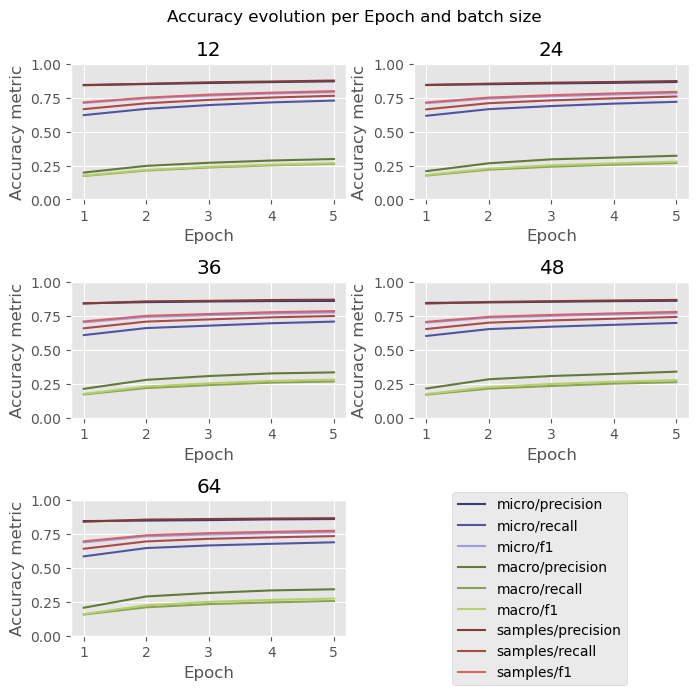

In [102]:
col = [0,1,3,4,5,6,12,13,14]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))

ax1 = axes[0, 0]
ax2 = axes[0, 1]
ax3 = axes[1, 0]
ax4 = axes[1, 1]
ax5 = axes[2, 0]

ax = [ax1,ax2,ax3,ax4,ax5]

for j in range(len(ax)):
    x = ax[j]
    for i in range(9):
        x.plot(np.arange(1,6),res[j]['training'].values[i], label=res[j].index[i], color=getColor('tab20b', 20,col[i]))
    #add axis labels to plot
    x.set_title(str(batch[j]))
    x.set_ylabel('Accuracy metric')
    x.set_xlabel('Epoch')
    x.set_ylim(0,1)

axes[2, 1].remove()  # don't display empty ax
handles, labels = ax5.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.9, 0.3))
#display plot
plt.style.use('ggplot')
plt.suptitle('Accuracy evolution per Epoch and batch size')
fig.tight_layout()
plt.show()

Here, it is hard to see the true evolution of the different metrics, as the scales are way different.
We are the going to take a look at them individually.

### Precision

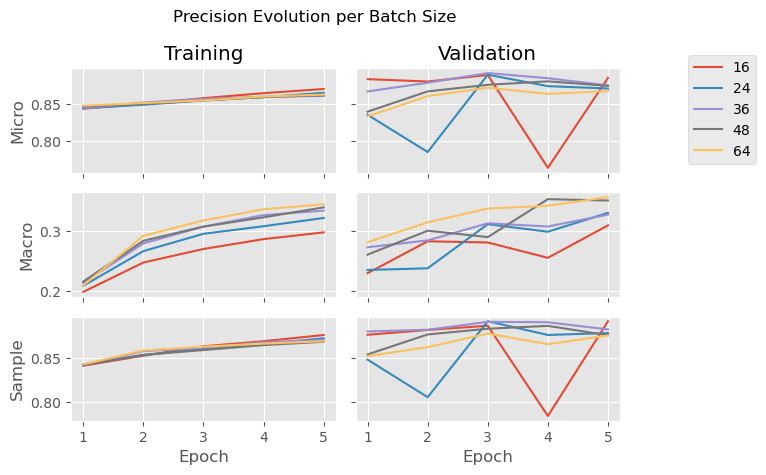

In [181]:
plot_micro_macro(res,'Precision','Batch Size')

### Total Loss

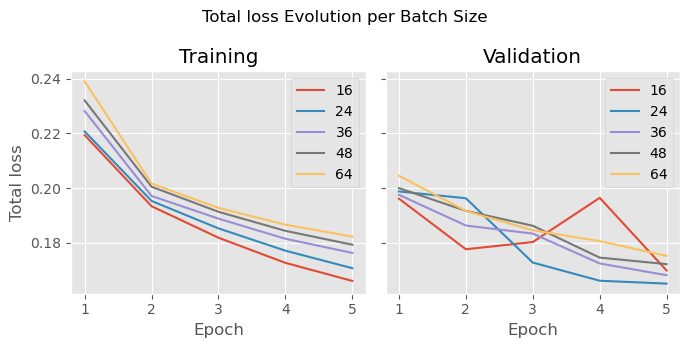

In [182]:
plot_loss(res,'Total loss','Batch Size')

## Learning rate Testing
### Data import

In [35]:
data_folder = "../ipeo-amazon/LearningRateTesting"
if not os.path.exists(data_folder):
    if os.path.exists("../IPEO-projet/LearningRateTesting"):
        data_folder = "../IPEO-projet/LearningRateTesting"
        
    else:
        data_folder = input("Enter the data folder path: ")
        
    assert os.path.exists(data_folder), "I did not find the folder at, " + str(data_folder)

In [36]:
res1 = pd.read_json(
    data_folder + '/SingleModel_training_results_5epochs_36batchsize_0_1lr_BCEWithLogitsLoss()_SGD_optim_False_Weigthed_2023-01-12.json')
res01 = pd.read_json(
    data_folder + '/SingleModel_training_results_5epochs_36batchsize_0_01lr_BCEWithLogitsLoss()_SGD_optim_False_Weigthed_2023-01-12.json')
res001 = pd.read_json(
    data_folder + '/SingleModel_training_results_5epochs_36batchsize_0_001lr_BCEWithLogitsLoss()_SGD_optim_False_Weigthed_2023-01-12.json')
res = [res1,res01,res001]
batch = [0.1,0.01,0.001]

### Plotting

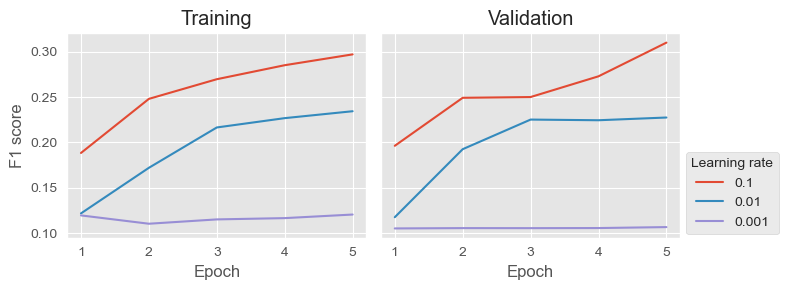

In [42]:
plt.style.use('ggplot')

fig, axes = plt.subplots(figsize = [7,3], nrows=1, ncols=2, sharex=True, sharey='row')
ax1 = axes[0]
ax2 = axes[1]

x = 2
param = 'F1 score'
hyper_param = 'learning rate'

for j in range(len(res)):
    ax1.plot(np.arange(1, 6), res[j]['training']['macro/f1'], label=str(batch[j]))
    ax2.plot(np.arange(1, 6), res[j]['validating']['macro/f1'], label=str(batch[j]))

ax1.set_title('Training')
ax1.set_ylabel('F1 score')
ax2.set_title('Validation')
ax1.set_xlabel('Epoch')
ax2.set_xlabel('Epoch')

#display plot
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.13,0.5), title='Learning rate')
#plt.suptitle(f'{param} Evolution per {hyper_param}')
fig.tight_layout()
plt.savefig("Lr_Testing_F1.jpg", pad_inches=10)
plt.show()

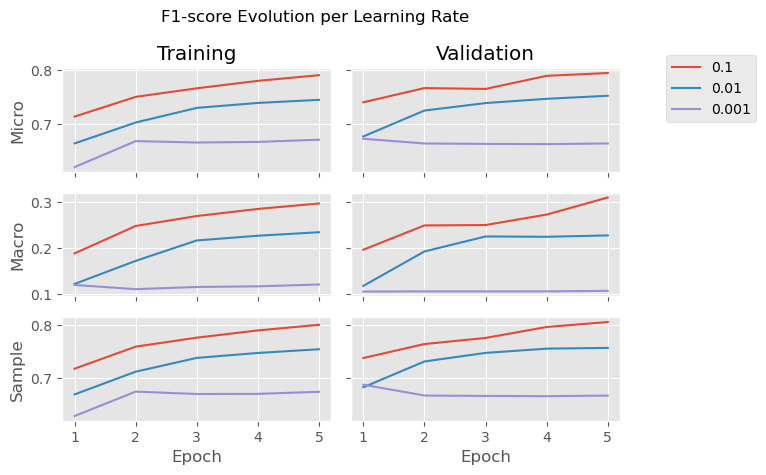

In [20]:
plot_micro_macro(res, param='F1-score')

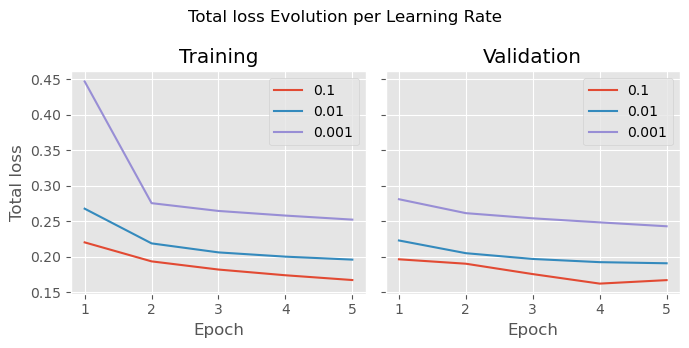

In [177]:
plot_loss(res)

## Transform Testing
### Data import

In [8]:
data_folder = '../ipeo-amazon/TransformsTesting'
if not os.path.exists(data_folder):
    data_folder = input("Enter the data folder path: ")
    assert os.path.exists(data_folder), "I did not find the folder at, " + str(data_folder)

In [9]:
reswith = pd.read_json(
    data_folder + '/SingleModel_training_results_5epochs_36batchsize_0_01lr_BCEWithLogitsLoss()_SGD_optim_WithTransforms_2023-01-12.json')
reswithout = pd.read_json(
    data_folder + '/SingleModel_training_results_5epochs_36batchsize_0_01lr_BCEWithLogitsLoss()_SGD_optim_NoTransforms_2023-01-12.json')
res = [reswith, reswithout]
batch = [1,0]

### Plotting

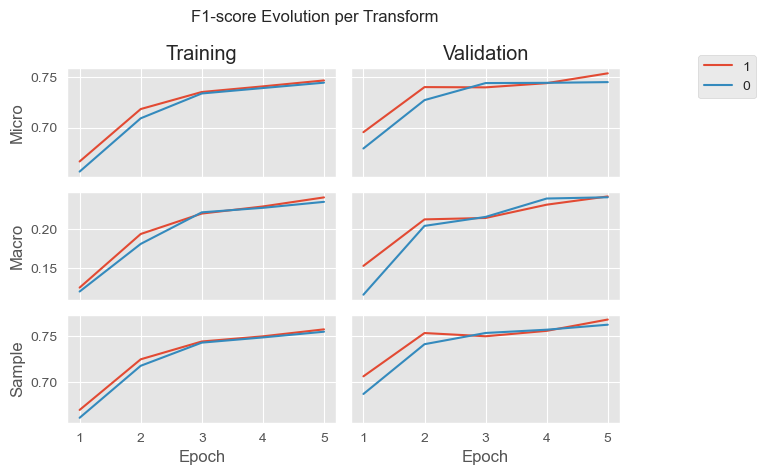

In [10]:
plot_micro_macro(res,param='F1-score',hyper_param='Transform')

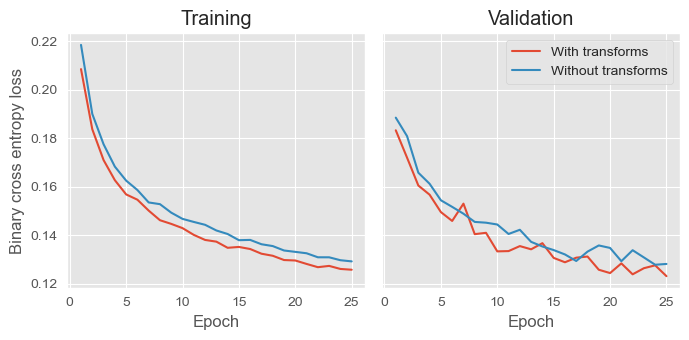

In [33]:
plot_loss(res,hyper_param='Transform', title=False, legends=["With transforms", "Without transforms"])

# Weighted loss case

In [26]:
data_folder = '../ipeo-amazon/TransformsTesting'
if not os.path.exists(data_folder):
    data_folder = input("Enter the data folder path: ")
    assert os.path.exists(data_folder), "I did not find the folder at, " + str(data_folder)

In [27]:
resNoWeights = pd.read_json(
    data_folder + '/SingleModel_training_results_25epochs_24batchsize_0_01lr_BCEWithLogitsLoss()_SGD_optim_False_Weigthed_2023-01-15.json')
resWeighted = pd.read_json(
    data_folder + '/SingleModel_training_results_25epochs_24batchsize_0_01lr_BCEWithLogitsLoss()_SGD_optim_True_Weigthed_2023-01-13.json')
res = [resWeighted, resNoWeights]

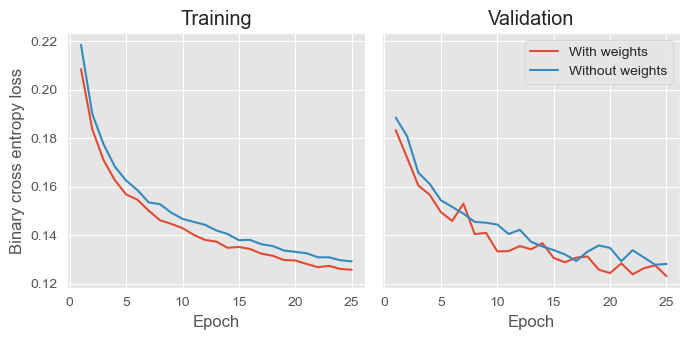

In [32]:
plot_loss(res,param = "Total loss", hyper_param='Loss weights', title=False, legends=["With weights", "Without weights"])